In [5]:
#Codigo para abrirlo

from os import path
import pandas as pd
raw_dataset = pd.read_csv("arbolado-publico-lineal-2017-2018.csv")
pd.set_option('display.max_rows', 5)

raw_dataset

C:\Users\Juanm\AppData\Local\Temp\ipykernel_9668\282628372.py:5: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_dataset = pd.read_csv("arbolado-publico-lineal-2017-2018.csv")


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370178,NaN,NaN,546143,Lineal,15,919,Guevara,1000.0,1000.0,NaN,LD6,Ceiba speciosa,3.3,Ocupada,Regular,A nivel,64.0,8.0
370179,NaN,NaN,546144,Lineal,15,919,Guevara,1000.0,1000.0,NaN,LD7,Ceiba speciosa,3.3,Ocupada,Regular,A nivel,61.0,8.0


El origen de los datos nos los da la pagina misma de donde extraemos el dataset. Donde se encuentran los atributos:

long: String. Donde se almacena la Longitud geográfica (X coordinate) donde se encuentra el árbol.
lat: String. Donde se almacena la Latitud geográfica (Y coordinate) donde se encuentra el árbol.
nro_registro: String. Número de registro único del árbol en el sistema.
tipo_activ: String. Tipo de actividad o clasificación del árbol. (e.g., 'Lineal'). Donde asusimos que hace referencia a la forma en que estan dispuestos los arboles, donde lineal hace referencia a que se encutran alineados, como podria ser en una cuadra
comuna: String. Número de la comuna donde se encuentra el árbol. las comunas son las unidades administrativas y politicas en las que se divide la ciudad de buenos aires. Esta posee valores de 1-15 (cualqueir valor fuera de este rango es erroneo) (no hay datos fuera de ese rango)
manzana: String. Identificador de la manzana donde se encuentra el árbol.
calle_nombre: String. Nombre de la calle donde se encuentra ubicado el árbol.
calle_altura: String. Altura de la calle donde se encuentra el árbol.
calle_chapa: String. Número de chapa de la calle más cercano al árbol.
direccion_normalizada: String. Dirección normalizada para la ubicación del árbol (por ejemplo, 'ESMERALDA 1120'). Donde figura el nombre de la calle + la altura (se deberia sacar ya que esta esta representada por calle_nombre y calle altura, se deberia dejar o este atributo o los dos anteriores)
ubicacion: String. Información adicional sobre la ubicación del árbol (por ejemplo, 'Exacta'). (ver que hacer con este atributo porque da cualquier cosa)
nombre_cientifico: String. Nombre científico de la especie del árbol.
ancho_acera: String. Ancho de la acera donde está ubicado el árbol, en metros.
estado_plantera: String. Estado de la plantación (por ejemplo, 'Ocupada'). (ver a que hace referencia este atributo)
ubicacion_plantera: String. Condición de la ubicación de la plantación (por ejemplo, 'Regular').
nivel_plantera: String. Nivel de la plantación respecto al suelo (por ejemplo, 'A nivel' o 'Elevada').
diametro_altura_pecho: String. Diámetro del árbol a la altura del pecho, en centímetros.
altura_arbol: String. Altura del árbol en metros.

------- trabajo con los atributos ------

El atributo "direccion_normalizada" no nos aporta informacion extra, ya que esta misma se encuentra concatenando la calle_nombre y calle_altura. Chequeamos si hay alguna fila que posea los valores de direccion normalizada con informacion, y calle_nombre y calle_altura sin informacion pero no la hay. Por lo cual procedemos a eliminar esta columna.



long                      15342
lat                       15342
nro_registro                  0
tipo_activ                    0
comuna                        0
manzana                  146040
calle_nombre                 93
calle_altura               5503
calle_chapa                6459
direccion_normalizada     14239
ubicacion                  8296
nombre_cientifico             0
ancho_acera                3097
estado_plantera               0
ubicacion_plantera         1404
nivel_plantera             1352
diametro_altura_pecho       286
altura_arbol               4322




In [ ]:
#Cantidad de valores nulos por columna (solo considero NaN)
from os import path
import pandas as pd
raw_dataset = pd.read_csv("arbolado-publico-lineal-2017-2018.csv")

conteo_nulos = raw_dataset.isnull().sum()
print (conteo_nulos)


#

C:\Users\Juanm\AppData\Local\Temp\ipykernel_5220\1500288022.py:4: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_dataset = pd.read_csv("arbolado-publico-lineal-2017-2018.csv")


long                      15342
lat                       15342
nro_registro                  0
tipo_activ                    0
comuna                        0
manzana                  146040
calle_nombre                 93
calle_altura               5503
calle_chapa                6459
direccion_normalizada     14239
ubicacion                  8296
nombre_cientifico             0
ancho_acera                3097
estado_plantera               0
ubicacion_plantera         1404
nivel_plantera             1352
diametro_altura_pecho       286
altura_arbol               4322
dtype: int64


In [10]:
#Distintos valores de manzanas para el dataset
valores_unicos = raw_dataset["comuna"].unique()
print (valores_unicos)

#Veo si alguna fila tiene el valor de calle_nombre y calle_altura en nulo pero direccion_normalizada no nula

import pandas as pd

# Filtrar las filas con la condición indicada
filtro = raw_dataset[
    raw_dataset["calle_nombre"].isna() &
    raw_dataset["calle_altura"].isna() &
    raw_dataset["direccion_normalizada"].notna()
]

# Mostrar el resultado
print(filtro)
print(filtro.shape[0])


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Empty DataFrame
Columns: [long, lat, nro_registro, tipo_activ, comuna, manzana, calle_nombre, calle_altura, calle_chapa, direccion_normalizada, ubicacion, nombre_cientifico, ancho_acera, estado_plantera, ubicacion_plantera, nivel_plantera, diametro_altura_pecho, altura_arbol]
Index: []
0


In [14]:
#Eliminamos la fila direccion_normalizada
import pandas as pd

raw_dataset = raw_dataset.drop(columns = ["direccion_normalizada"])

raw_dataset

,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370178,NaN,NaN,546143,Lineal,15,919,Guevara,1000.0,1000.0,LD6,Ceiba speciosa,3.3,Ocupada,Regular,A nivel,64.0,8.0
370179,NaN,NaN,546144,Lineal,15,919,Guevara,1000.0,1000.0,LD7,Ceiba speciosa,3.3,Ocupada,Regular,A nivel,61.0,8.0


[nan '13' '591' ... '23y' '488 bis' '126 b']


In [26]:
#imprimo los distintos valores de una columna
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

df_valores = pd.DataFrame(
    sorted(raw_dataset["nivel_plantera"].dropna().unique()), 
    columns=["nivel_plantera"]
)

df_valores


,nivel_plantera
0,A Nivel
1,A Nivel
2,A nivel
3,A nivel
4,AN
5,An
6,BN
7,Baja Nivel
8,Bajo nivel
9,Bajo Bivel


Hipotesis 1:

El diametro a la altura del pecho se ve influenciado por el ancho de la acera, es decir lo arboles con mayor diametro a la altura de pecho se encuentran en las aceras mas anchas. Donde la anchura de la acera determina el diametro a la altura del pecho del arbol y viceversa

Hipotesis 2:

Hay comunas en las cuales todos sus arboles son de un tipo dado

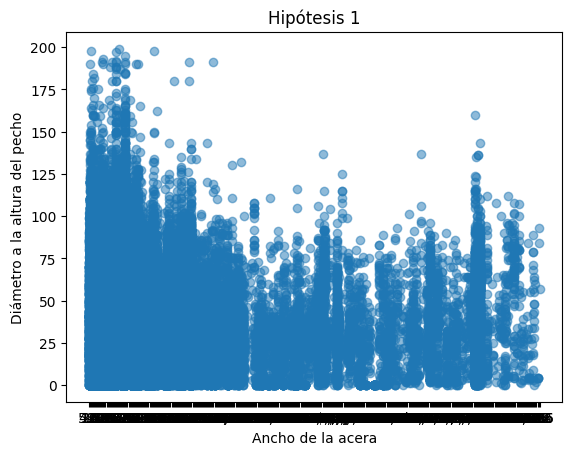

In [28]:
import matplotlib.pyplot as plt

# Filtrar filas válidas (sin NaN)
df_filtrado = raw_dataset.dropna(subset=["ancho_acera", "diametro_altura_pecho"])

plt.plot(df_filtrado["ancho_acera"], df_filtrado["diametro_altura_pecho"], 'o', alpha=0.5)

plt.xlabel("Ancho de la acera")
plt.ylabel("Diámetro a la altura del pecho")
plt.title("Hipótesis 1")
plt.show()
